### **Import necessary libraries**

In [1]:
import requests
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

### **Input pre-processing**

In [7]:
img = Image.open(f"../sample/sample 1.png").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)

img2 = Image.open(f"../sample/sample 2.png").convert("L")
img2 = ImageOps.invert(img2)
img2 = img2.resize((28, 28))
img2_arr = np.array(img2)
img2_arr = img2_arr / 255.0
img2_arr = img2_arr.reshape(28, 28, 1)

img3 = Image.open(f"../sample/sample 3.png").convert("L")
img3 = ImageOps.invert(img3)
img3 = img3.resize((28, 28))
img3_arr = np.array(img3)
img3_arr = img3_arr / 255.0
img3_arr = img3_arr.reshape(28, 28, 1)

### **Get results from the deployed model**


In [ ]:
API_KEY = "" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist(), img2_arr.tolist(), img3_arr.tolist()]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/ae43e79c-1fbc-450a-b0b4-9a54c451033b/predictions?version=2022-11-10', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})

### **Display results**

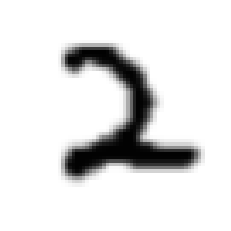

Result: 2


In [17]:
plt.imshow(plt.imread("../sample/sample 1.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])

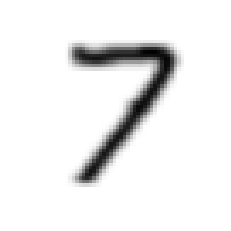

Result: 7


In [18]:
plt.imshow(plt.imread("../sample/sample 2.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][1][1])

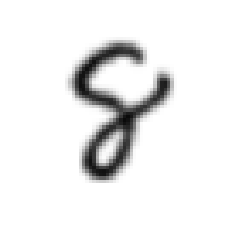

Result: 8


In [20]:
plt.imshow(plt.imread("../sample/sample 3.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][2][1])